In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [78]:
df = pd.read_csv(r'C:\Users\ryan\Desktop\Thinkful DS Sample Data - Main Course\Unit 5\ESSdata_Thinkful.csv')

Group Adminstrative variables; country, identifications numbers, editions. Automatically included in data file.
Name
Label
Question
cntry
Country
All rounds: Country
year
ESS round
All rounds: ESS round
idno
Respondent's identification number
All rounds: Respondent's identification number
tvtot
TV watching, total time on average weekday
All rounds: On an average weekday, how much time, in total, do you spend watching television?
ppltrst
Most people can be trusted or you can't be too careful
All rounds: Using this card, generally speaking, would you say that most people can be trusted, or that you can't be too careful in dealing with people? Please tell me on a score of 0 to 10, where 0 means you can't be too careful and 10 means that most people can be trusted.
pplfair
Most people try to take advantage of you, or try to be fair
All rounds: Using this card, do you think that most people would try to take advantage of you if they got the chance, or would they try to be fair?
pplhlp
Most of the time people helpful or mostly looking out for themselves
All rounds: Would you say that most of the time people try to be helpful or that they are mostly looking out for themselves?
happy
How happy are you
All rounds: Taking all things together, how happy would you say you are?
sclmeet
How often socially meet with friends, relatives or colleagues
All rounds: Using this card, how often do you meet socially with friends, relatives or work colleagues?
sclact
Take part in social activities compared to others of same age
All rounds: Compared to other people of your age, how often would you say you take part in social activities ?
gndr
Gender
All rounds: CODE SEX, respondent
agea
Age of respondent, calculated
All rounds: Age of respondent, calculated
partner
Lives with husband/wife/partner at household grid
All rounds: INTERVIEWER CODE:

In [79]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [80]:
df.describe()

,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
count,8.594000e+03,8594.000000,8586.000000,8580.000000,8555.000000,8569.000000,8563.000000,8579.000000,8500.000000,8584.000000,8355.000000,8577.000000
mean,3.954938e+04,6.500000,3.861985,5.559907,6.005143,5.319874,7.694616,5.192563,2.748941,1.497204,47.470736,1.384867
std,6.267259e+05,0.500029,2.019689,2.233700,2.129866,2.173449,1.735904,1.457643,0.905477,0.500021,18.397369,0.486592
min,1.000000e+00,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,1.000000
25%,1.052000e+03,6.000000,2.000000,4.000000,5.000000,4.000000,7.000000,4.000000,2.000000,1.000000,33.000000,1.000000
50%,1.714000e+03,6.500000,4.000000,6.000000,6.000000,5.000000,8.000000,6.000000,3.000000,1.000000,47.000000,1.000000
75%,2.745000e+03,7.000000,5.000000,7.000000,8.000000,7.000000,9.000000,6.000000,3.000000,2.000000,62.000000,2.000000
max,1.100143e+07,7.000000,7.000000,10.000000,10.000000,10.000000,10.000000,7.000000,5.000000,2.000000,114.000000,2.000000


In [81]:
#Check to see if any nulls
print('Number of observations in the dataframe: {}'.format(len(df)))
print('Number of NaN observations in each column:\n{}'.format(np.sum(df.isnull())))

Number of observations in the dataframe: 8594
Number of NaN observations in each column:
cntry        0
idno         0
year         0
tvtot        8
ppltrst     14
pplfair     39
pplhlp      25
happy       31
sclmeet     15
sclact      94
gndr        10
agea       239
partner     17
dtype: int64


In [82]:
#NaNs are droppbable, as they do not constitute a large percentage of the observations
print('Percentage of dataset remaining: {}'.format(len(df.dropna())/len(df)))
df = df.dropna()

Percentage of dataset remaining: 0.9479869676518501


In [83]:
#Draw histograms, excluding cntry (because it is character, and df.hist won't work), idno, and year

def draw_hists(df, desired_rows, desired_columns):
    fig = plt.figure(figsize = (10,10)) #Creates the figure instance
    for i, col in enumerate(df.columns):
        ax = fig.add_subplot(desired_rows, desired_columns, i+1) #create an axes object for each subplot
        ax.set_title(col + " Distribution")
        df[col].hist(ax = ax) #axes objects have the plotting methods. this creates a plot to add to the figure
    
    plt.tight_layout()
    plt.show()

Technically, we need to check the distributions for each year (and see whether or not they are normally distributed), since we are comparing means/medians over two years (2012 v 2014)

Year 2012 



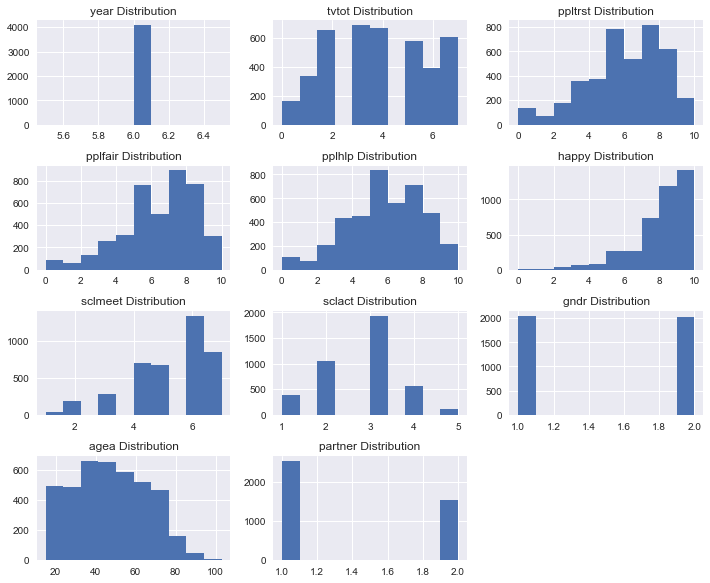

In [84]:
df2 = df.drop(['cntry', 'idno'], 1)
print('Year 2012 \n')
draw_hists(df2[df2['year'] == 6], 5, 3)

Year 2014 



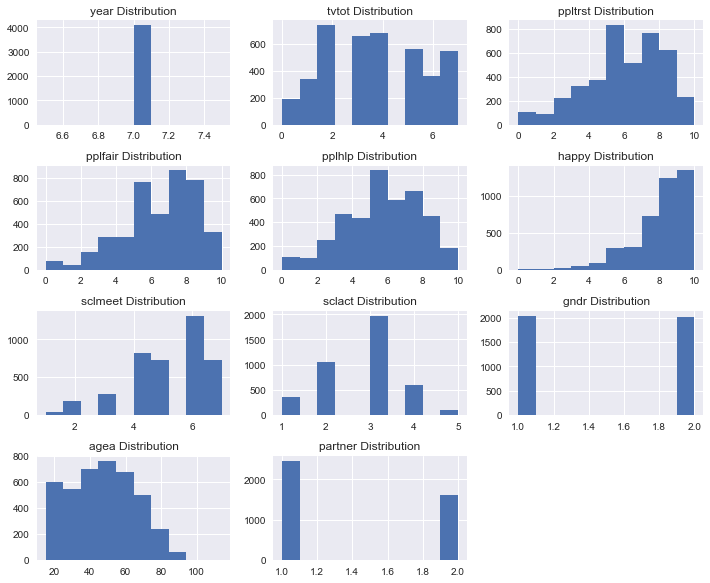

In [85]:
print('Year 2014 \n')
draw_hists(df2[df2['year'] == 7], 5, 3)

In [86]:
#Plot the variable relationships, excluding idno and year
#sns.pairplot(df.drop(['idno', 'year'], 1).iloc[:, :])

# In this dataset, the same participants answered questions in 2012 and again 2014.

# #1) Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

The ppltrst variable does not visually fit a normal distribution very well - check the Shapiro-Wilk test statistic, W. Values close to 1 indicate that the distribution is similar to a normal distribution. The smaller the W statistic becomes, the more divergence there is between the distribution of the data and the normal distribution

In [87]:
import scipy.stats as stats

In [88]:
#If the p-value is greater than 0.05, then the null hypothesis is not rejected, which means the data is normally distributed.

print('2012: ', stats.shapiro(df[df['year'] == 6]['ppltrst']))
print('2014: ', stats.shapiro(df[df['year'] == 7]['ppltrst']))

2012:  (0.9520939588546753, 1.4426241793085802e-34)
2014:  (0.9580563902854919, 9.222525335052542e-33)


In both groups, p < 0.05, so we **reject** the null hypothesis that the data is normally distributed. This tells us we have to use non-parametric tests. In this case, we have an A/B test where all participants experience both versions, so we need to use the Wilcoxon signed-rank test. 

In [89]:
#We also have slightly different numbers of responders in 2012 and 2014, so we now need to make sure we're only inlcuding
#idnos where the person responded for both years

df_12 = df[df['year'] == 6]
df_14 = df[df['year'] == 7]

print(len(df_12))
print(len(df_14))

4071
4076


In [90]:
#Further inspection reveals that there are duplicate idnos, but they appear to be unique on (cntry & idno)
df[df['idno'] == 5.0]

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
773,CH,5.0,7,2.0,8.0,9.0,7.0,9.0,6.0,4.0,1.0,69.0,1.0
2892,ES,5.0,6,4.0,5.0,7.0,5.0,10.0,6.0,1.0,2.0,38.0,1.0
4105,ES,5.0,7,2.0,7.0,7.0,6.0,8.0,7.0,3.0,1.0,46.0,1.0


In [91]:
result = df_12.merge(df_14, on = ['cntry', 'idno'], how = 'inner')

In [92]:
len(result)

3877

In [93]:
result[result['idno'] == 5.0]

,cntry,idno,year_x,tvtot_x,ppltrst_x,pplfair_x,pplhlp_x,happy_x,sclmeet_x,sclact_x,...,tvtot_y,ppltrst_y,pplfair_y,pplhlp_y,happy_y,sclmeet_y,sclact_y,gndr_y,agea_y,partner_y
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,...,2.0,8.0,9.0,7.0,9.0,6.0,4.0,1.0,69.0,1.0
1278,ES,5.0,6,4.0,5.0,7.0,5.0,10.0,6.0,1.0,...,2.0,7.0,7.0,6.0,8.0,7.0,3.0,1.0,46.0,1.0


So now the results have been 'flattened' where the 2012 data corresponds to var_x and 2014 corresponds to var_y.

We have 3,877 responders who responded to all questions in both 2012 and 2014.

In [94]:
for cntry in set(result['cntry']):

    a = result[result['cntry'] == cntry]['ppltrst_x']
    b = result[result['cntry'] == cntry]['ppltrst_y']

    print('Country: {}\n'.format(cntry))
    print('Number of Responders: {}'.format(len(a)))
    print('Avg Trust in 2012: {}'.format(np.mean(a)))
    print('Avg Trust in 2014: {}\n'.format(np.mean(b)))
    print(stats.wilcoxon(a, b), '\n')

Country: DE

Number of Responders: 13
Avg Trust in 2012: 5.076923076923077
Avg Trust in 2014: 5.230769230769231

WilcoxonResult(statistic=44.0, pvalue=0.91571346008998633) 

Country: CH

Number of Responders: 707
Avg Trust in 2012: 5.691654879773692
Avg Trust in 2014: 5.724186704384724

WilcoxonResult(statistic=88744.5, pvalue=0.68708262982731094) 

Country: ES

Number of Responders: 1085
Avg Trust in 2012: 5.121658986175115
Avg Trust in 2014: 4.941013824884792

WilcoxonResult(statistic=197976.0, pvalue=0.03498230453843465) 

Country: SE

Number of Responders: 827
Avg Trust in 2012: 6.03627569528416
Avg Trust in 2014: 6.259975816203144

WilcoxonResult(statistic=104619.5, pvalue=0.020616883287247222) 

Country: CZ

Number of Responders: 556
Avg Trust in 2012: 4.39748201438849
Avg Trust in 2014: 4.368705035971223

WilcoxonResult(statistic=61723.5, pvalue=0.83906007718038333) 

Country: NO

Number of Responders: 689
Avg Trust in 2012: 6.637155297532656
Avg Trust in 2014: 6.574746008708272

Null Hypothesis is that the distributions have the same median. p < 0.05 for ES and SE, so we CAN reject the null hypothesis for ES (Spain) and SE (Sweden). Result is that we can say that people's trust decreased in Spain and increased in Sweden between 2012 and 2014. We cannot say that trust levels changed in the other 4 countries during this time.

# #2) Did people become happier from 2012 to 2014? Compute results for each country in the sample.

In [95]:
#If the p-value is greater than 0.05, then the null hypothesis is not rejected, which means the data is normally distributed.

print('2012: ', stats.shapiro(df[df['year'] == 6]['happy']))
print('2014: ', stats.shapiro(df[df['year'] == 7]['happy']))

2012:  (0.8943395018577576, 0.0)
2014:  (0.9060227870941162, 1.2611686178923354e-44)


In both groups, p < 0.05, so we **reject** the null hypothesis that the data is normally distributed. This tells us we have to use non-parametric tests. In this case, we have an A/B test where all participants experience both versions, so we need to use the Wilcoxon signed-rank test. 

In [96]:
for cntry in set(result['cntry']):

    a = result[result['cntry'] == cntry]['happy_x']
    b = result[result['cntry'] == cntry]['happy_y']

    print('Country: {}\n'.format(cntry))
    print('Number of Responders: {}'.format(len(a)))
    print('Avg Happiness in 2012: {}'.format(np.mean(a)))
    print('Avg Happiness in 2014: {}\n'.format(np.mean(b)))
    print(stats.wilcoxon(a, b), '\n')

Country: DE

Number of Responders: 13
Avg Happiness in 2012: 7.3076923076923075
Avg Happiness in 2014: 7.923076923076923

WilcoxonResult(statistic=16.0, pvalue=0.2365019314807173) 

Country: CH

Number of Responders: 707
Avg Happiness in 2012: 8.074964639321076
Avg Happiness in 2014: 8.123055162659123

WilcoxonResult(statistic=75726.5, pvalue=0.75756074356396752) 

Country: ES

Number of Responders: 1085
Avg Happiness in 2012: 7.545622119815668
Avg Happiness in 2014: 7.450691244239631

WilcoxonResult(statistic=190064.5, pvalue=0.15739932727037309) 

Country: SE

Number of Responders: 827
Avg Happiness in 2012: 7.894800483675938
Avg Happiness in 2014: 7.94074969770254

WilcoxonResult(statistic=103562.0, pvalue=0.58959412298418135) 

Country: CZ

Number of Responders: 556
Avg Happiness in 2012: 6.780575539568345
Avg Happiness in 2014: 6.9352517985611515

WilcoxonResult(statistic=55932.0, pvalue=0.22849644123659796) 

Country: NO

Number of Responders: 689
Avg Happiness in 2012: 8.2539912

From these results we can conclude that people in Norway (NO) became less happy between 2012 and 2014. We cannot claim that happiness levels changed significantly in other countries during this time.

# #3) Who reported watching more TV in 2012, men or women?

In [97]:
#If the p-value is greater than 0.05, then the null hypothesis is not rejected, which means the data is normally distributed.

print('2012 Men:   ', stats.shapiro(df[((df['year'] == 6) & (df['gndr'] == 1.0))]['tvtot']))
print('2012 Women: ', stats.shapiro(df[((df['year'] == 6) & (df['gndr'] == 2.0))]['tvtot']))

2012 Men:    (0.9443334937095642, 3.718612884828085e-27)
2012 Women:  (0.9407297372817993, 1.0867231118970029e-27)


For 2012, p < 0.05 for both groups, so we reject the null hypothesis that the data is normally distributed. This tells us we have to use non-parametric tests. In this case, we have an A/B test with **independent** samples, so we can use the following tests:

3a) The Mann–Whitney U test is a nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample.

In [98]:
a = df[((df['year'] == 6) & (df['gndr'] == 1.0))]['tvtot']
b = df[((df['year'] == 6) & (df['gndr'] == 2.0))]['tvtot']

print('Avg TV Men: {}'.format(np.mean(a)))
print('Avg TV Women: {}'.format(np.mean(b)))

stats.mannwhitneyu(a, b)

Avg TV Men: 3.8592303945445687
Avg TV Women: 3.9053518334985133


MannwhitneyuResult(statistic=2042391.5, pvalue=0.21654019333228419)

If the p-value is below 0.05, the null hypothesis can be rejected and at least one significant difference can be assumed. That is not the case here - our first test suggests that we cannot infer a significant difference between the TV habits of men and women. 

3b) Kruskal–Wallis: this test extends the Mann–Whitney U test when there are more than two groups. It is not needed here since we are only comparing men and women (2 total groups), but I'll add it for fun, and to see if the results agree with the Mann-Whitney U Test above.

In [99]:
stats.kruskal(a, b)

KruskalResult(statistic=0.61456950874282645, pvalue=0.43307247861711418)

Once again, the p-value > 0.05, which means we fail to reject the null hypothesis that the medians of all groups are equal.

3c) The Median Test, which can be used in situations where the assumption of approximately equal variances across the sample populations does not hold, the median test is an appropriate test. Otherwise, we should use the Wilcoxon–Mann–Whitney U two-sample test or its generalisation for more samples, the Kruskal-Wallis test (higher power / efficiency).

The null hypothesis here is that two or more samples come from populations with the same median.

In [100]:
stats.median_test(a, b)

(0.093682652772806171, 0.75954661289376246, 4.0, array([[ 787,  784],
        [1266, 1234]], dtype=int64))

The p-value in this case is 0.76, which means that we fail to reject the null hypothesis. This is further evidence that the samples do not have different medians.

# #4) Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

In [101]:
#If the p-value is greater than 0.05, then the null hypothesis is not rejected, which means the data is normally distributed.

print('2012 w/ Partner: ', stats.shapiro(df[((df['year'] == 6) & (df['partner'] == 1.0))]['pplfair']))
print('2012 no Partner: ', stats.shapiro(df[((df['year'] == 6) & (df['partner'] == 2.0))]['pplfair']))

2012 w/ Partner:  (0.9396088123321533, 5.344745707680362e-31)
2012 no Partner:  (0.9547916650772095, 2.436869843664993e-21)


For 2012, p < 0.05 for both groups, so we reject the null hypothesis that the data is normally distributed. This tells us we have to use non-parametric tests. In this case, we have an A/B test with independent samples, so we can use the same tests we used for question #3.

In [102]:
a = df[((df['year'] == 6) & (df['partner'] == 1.0))]['pplfair']
b = df[((df['year'] == 6) & (df['partner'] == 2.0))]['pplfair']

print('Avg Fairness w/ Partner: {}'.format(np.mean(a)))
print('Avg Fairness no Partner: {}'.format(np.mean(b)))

stats.mannwhitneyu(a, b)

Avg Fairness w/ Partner: 6.0743509047993705
Avg Fairness no Partner: 5.86592544146501


MannwhitneyuResult(statistic=1819821.5, pvalue=0.00028258143613772957)

The Mann-Whitney U test suggests that people living with a partner were more likely to believe people were fair in 2012. Let's use the median test to see if it aligns with this result.

In [103]:
stats.median_test(a, b)

(15.427324224044817, 8.5739546356354812e-05, 6.0, array([[1290,  678],
        [1252,  851]], dtype=int64))

The p-value of 8.57 * 10^-5 means that we can reject the null hypothesis that the samples do not have different medians.

# #5) Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [104]:
a = df[((df['year'] == 7) & (df['cntry'] == 'CZ'))]['sclmeet']
b = df[((df['year'] == 7) & (df['cntry'] == 'NO'))]['sclmeet']
c = df[((df['year'] == 7) & (df['cntry'] == 'ES'))]['sclmeet']

In [105]:
#If the p-value is greater than 0.05, then the null hypothesis is not rejected, which means the data is normally distributed.

print('2014 CZ: ', stats.shapiro(a))
print('2014 CZ Avg Social Meet Score: ', np.mean(a))
print('2014 NO: ', stats.shapiro(b))
print('2014 NO Avg Social Meet Score: ', np.mean(b))
print('2014 ES: ', stats.shapiro(c))
print('2014 ES Avg Social Meet Score: ', np.mean(c))

2014 CZ:  (0.9442529678344727, 2.5792776660142624e-14)
2014 CZ Avg Social Meet Score:  4.4950495049504955
2014 NO:  (0.887718915939331, 2.5375396023327397e-22)
2014 NO Avg Social Meet Score:  5.310393258426966
2014 ES:  (0.8927679657936096, 2.280180298346974e-27)
2014 ES Avg Social Meet Score:  5.263668430335097


Once again, it appears that we cannot assume a normal distribution and need to use non-parametric tests. Because we have more than two groups, and the samples are independent, we can use the Kruskal–Wallis and Median tests to see if any one of the 3 countries has a different median. If so, we can conduct a Mann-Whitney U test to determine which country/countries are different.

In [106]:
stats.kruskal(a, b, c)

KruskalResult(statistic=137.99764626257269, pvalue=1.0819117969111045e-30)

The p-value < 0.05, which means we reject the null hypothesis that the medians of all groups are equal. Now to find the outlier(s)...

In [107]:
print(stats.mannwhitneyu(a, b))
print(stats.mannwhitneyu(a, c))
print(stats.mannwhitneyu(b, c))

MannwhitneyuResult(statistic=147801.0, pvalue=2.4170120935752383e-24)
MannwhitneyuResult(statistic=238281.0, pvalue=2.119303290451085e-27)
MannwhitneyuResult(statistic=400483.5, pvalue=0.38301876951707503)


The above results show that A (CZ) is different than both NO and ES with respect to the median Social Meet score. There is no significant difference between the medians of NO and ES, though. CZ is the outlier here. We can confirm with the median test. See below - the outcome is the same.

In [108]:
print(stats.median_test(a, b))
print(stats.median_test(a, c))
print(stats.median_test(b, c))

(102.11071453758723, 5.2503798209606056e-24, 5.0, array([[171, 399],
       [435, 313]], dtype=int64))
(86.835619556385026, 1.1792638440257081e-20, 5.0, array([[171, 585],
       [435, 549]], dtype=int64))
(0.43918486689100733, 0.50751614798049483, 6.0, array([[134, 229],
       [578, 905]], dtype=int64))


# #6) Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

To answer this one, we're going to have to create some age buckets. 

In [129]:
age_bins = [0, 20, 30, 40, 50, 60, 70, 120]
bin_names = ['<= 20', '21-30', '31-40', '41-50', '51-60', '61-70', '> 70']
age_groups = pd.cut(df['agea'], age_bins, labels = bin_names)
df['age_bin'] = age_groups

In [132]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner,age_bin
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0,51-60
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0,51-60
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0,21-30
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0,61-70
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0,51-60


In [133]:
#Test whether the data are normally distributed for each group using the Shapiro test

for grp in bin_names:
    a = df[((df['year'] == 7) & (df['cntry'] == 'CZ') & (df['age_bin'] == grp))]['sclact']
    b = df[((df['year'] == 7) & (df['cntry'] == 'NO') & (df['age_bin'] == grp))]['sclact']
    c = df[((df['year'] == 7) & (df['cntry'] == 'ES') & (df['age_bin'] == grp))]['sclact']
    print('Group: {}\n'.format(grp))
    print(stats.shapiro(a))
    print(stats.shapiro(b))
    print(stats.shapiro(c))
    print('\n')

Group: <= 20

(0.8572293519973755, 4.76399072795175e-05)
(0.8225530982017517, 8.551379693244598e-08)
(0.8558431267738342, 2.2334506866172887e-07)


Group: 21-30

(0.7657854557037354, 1.8513143795750864e-10)
(0.8451725244522095, 2.5140071358009664e-08)
(0.8737794160842896, 6.149867282090327e-10)


Group: 31-40

(0.8209254741668701, 5.929730595433114e-10)
(0.8703453540802002, 3.636592182942877e-08)
(0.84430992603302, 5.566013145177906e-13)


Group: 41-50

(0.8134452700614929, 1.8597807321940607e-11)
(0.8450345993041992, 8.665011069775019e-11)
(0.8835363388061523, 3.049229922377772e-12)


Group: 51-60

(0.8514318466186523, 5.807427316817382e-10)
(0.84114009141922, 2.5128521485839883e-10)
(0.9013221263885498, 2.6369018080174556e-10)


Group: 61-70

(0.8865365982055664, 3.880475560436025e-06)
(0.8779763579368591, 9.524568156393798e-08)
(0.9001230001449585, 4.1739088629810794e-08)


Group: > 70

(0.8752238750457764, 0.0010820581810548902)
(0.8903095722198486, 8.854847692418844e-06)
(0.880016

Once again, it appears that we cannot assume a normal distribution and need to use non-parametric tests. Because we have more than two groups, and the samples are independent, we can use the Kruskal–Wallis and Median tests to see if any one of the 3 countries has a different median. If so, we can conduct a Mann-Whitney U test to determine which country/countries are different.

In [135]:
for grp in bin_names:
    a = df[((df['year'] == 7) & (df['cntry'] == 'CZ') & (df['age_bin'] == grp))]['sclact']
    b = df[((df['year'] == 7) & (df['cntry'] == 'NO') & (df['age_bin'] == grp))]['sclact']
    c = df[((df['year'] == 7) & (df['cntry'] == 'ES') & (df['age_bin'] == grp))]['sclact']
    print('Group: {}\n'.format(grp))
    print('2014 CZ Avg Social Act Score: ', np.mean(a))
    print('2014 NO Avg Social Act Score: ', np.mean(b))
    print('2014 ES Avg Social Act Score: ', np.mean(c))
    print(stats.kruskal(a, b, c))
    print('\n')

Group: <= 20

2014 CZ Avg Social Act Score:  3.0217391304347827
2014 NO Avg Social Act Score:  2.9859154929577465
2014 ES Avg Social Act Score:  2.691358024691358
KruskalResult(statistic=6.3878244928913421, pvalue=0.041011111104415326)


Group: 21-30

2014 CZ Avg Social Act Score:  2.9195402298850577
2014 NO Avg Social Act Score:  2.934065934065934
2014 ES Avg Social Act Score:  2.751677852348993
KruskalResult(statistic=4.2100237007904004, pvalue=0.12184423035824231)


Group: 31-40

2014 CZ Avg Social Act Score:  2.5904761904761906
2014 NO Avg Social Act Score:  2.811320754716981
2014 ES Avg Social Act Score:  2.6736842105263157
KruskalResult(statistic=2.5608098534799288, pvalue=0.27792473850674215)


Group: 41-50

2014 CZ Avg Social Act Score:  2.6484375
2014 NO Avg Social Act Score:  2.79136690647482
2014 ES Avg Social Act Score:  2.7149122807017543
KruskalResult(statistic=2.161787351650466, pvalue=0.3392921729030085)


Group: 51-60

2014 CZ Avg Social Act Score:  2.6692913385826773


The p-value < 0.05 for a few of the age/country groups, including <=20, 61-70, and > 70, which means we reject the null hypothesis that the medians of all groups are equal. Now to find the outlier countries in those age groups. To do so, we will need to use the Mann-Whitney U test.

In [136]:
bin_names2 = ['<= 20', '61-70', '> 70']

for grp in bin_names2:
    a = df[((df['year'] == 7) & (df['cntry'] == 'CZ') & (df['age_bin'] == grp))]['sclact']
    b = df[((df['year'] == 7) & (df['cntry'] == 'NO') & (df['age_bin'] == grp))]['sclact']
    c = df[((df['year'] == 7) & (df['cntry'] == 'ES') & (df['age_bin'] == grp))]['sclact']
    print('Group: {}\n'.format(grp))
    print(stats.mannwhitneyu(a, b))
    print(stats.mannwhitneyu(a, c))
    print(stats.mannwhitneyu(b, c))
    print('\n')

Group: <= 20

MannwhitneyuResult(statistic=1502.5, pvalue=0.2094694610737548)
MannwhitneyuResult(statistic=1446.5, pvalue=0.012034285032599443)
MannwhitneyuResult(statistic=2419.0, pvalue=0.031557900857670698)


Group: 61-70

MannwhitneyuResult(statistic=4083.0, pvalue=0.47036282151970155)
MannwhitneyuResult(statistic=4513.5, pvalue=0.01628793880311849)
MannwhitneyuResult(statistic=5827.5, pvalue=0.0052217599680426663)


Group: > 70

MannwhitneyuResult(statistic=957.5, pvalue=0.014116070654811245)
MannwhitneyuResult(statistic=2219.5, pvalue=0.14586136833217089)
MannwhitneyuResult(statistic=3582.5, pvalue=4.5683545491257771e-06)




For ages <= 20 and 61-70, ES is the outlier. For > 70, the outlier is NO.